https://www.kaggle.com/competitions/playground-series-s3e13/data?select=test.csv"

Cool solution
https://www.kaggle.com/code/davidcoxon/complete-eda-data-egineering-and-model-comparison

In [2]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import KFold, cross_val_score

# Download latest version
!kaggle competitions download -c playground-series-s3e13

#
#path = Path (kagglehub.dataset_download("https://www.kaggle.com/competitions/playground-series-s3e13/data?select=test.csv"))
#print ("Path to dataset files:", path)
#data_set_name = Path ("Titanic-Dataset.csv")
#s0 = pd.read_csv(path / data_set_name, header=None)
#s0

playground-series-s3e13.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile 
import pandas as pd

# Extract all contents of the ZIP file
with zipfile.ZipFile("playground-series-s3e13.zip", 'r') as zip_ref:
    zip_ref.extractall("playground-series-s3e13")

print("Files extracted successfully!")

test_name = Path ("test.csv")
train_name = Path ("train.csv")

test = pd.read_csv( "playground-series-s3e13" / test_name )
train = pd.read_csv( "playground-series-s3e13" / train_name )



Files extracted successfully!


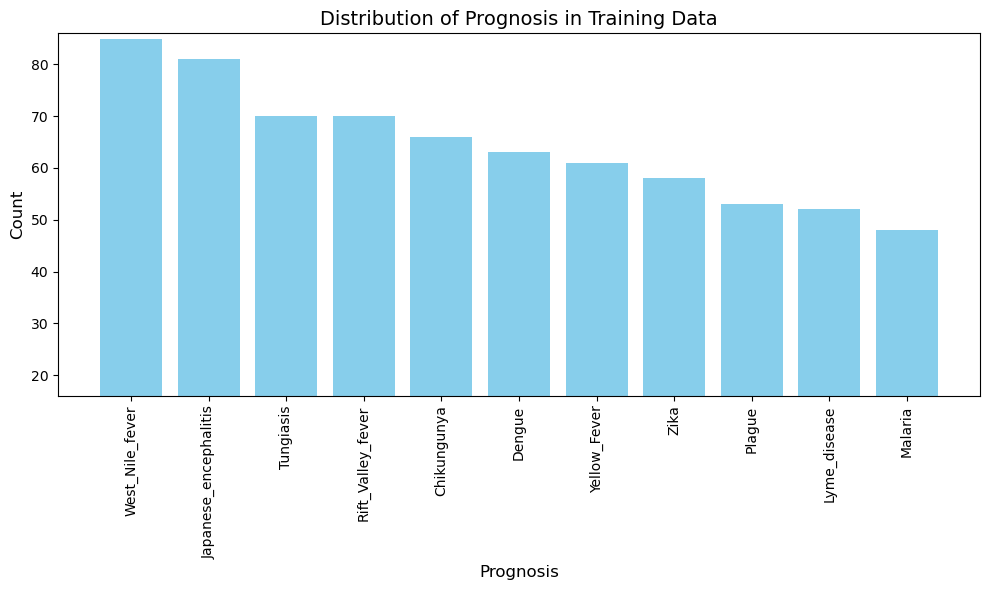

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Calculate value counts
prognosis_counts = train['prognosis'].value_counts()

# Reset index for plotting
prognosis_counts = prognosis_counts.reset_index()
prognosis_counts.columns = ['Prognosis', 'Count']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size

ax.bar(prognosis_counts['Prognosis'], prognosis_counts['Count'], color='skyblue')

# Add labels and title
ax.set_title("Distribution of Prognosis in Training Data", fontsize=14)
ax.set_xlabel("Prognosis", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
ax.set_ylim(prognosis_counts['Count'].min() / 3, prognosis_counts['Count'].max() + 1)
# Show the plot
plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import random
random_seed = 32
random.seed(random_seed)

y = train["prognosis"]
y = y.to_frame()
X = train.drop (columns = ["prognosis"])

X = X.drop (columns = ["id"])

label_encoder = LabelEncoder()

#y = label_encoder.fit_transform (y)
#y = np.DataFrame(y).to_frame()
#y = pd.DataFrame(y)


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=random_seed)

print(y_test)
y_test = label_encoder.fit_transform (y_test)
print(y_test)


y_train = label_encoder.fit_transform (y_train)

y_train = y_train.squeeze()
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

        prognosis
485   Chikungunya
13        Malaria
694       Malaria
495  Yellow_Fever
230  Yellow_Fever
..            ...
451          Zika
58        Malaria
631        Plague
487     Tungiasis
15        Malaria

[142 rows x 1 columns]
[ 0  4  4  9  9  7  4  7  7  1 10  2  0  3  9  2  7  6  8  1  2  3  9  4
  7  0  4  8  8  8  2  2  9  2  9 10  7  2  7  9  7  3  2  4  5  3  9  3
  6  6  5  8  9 10 10  2  5  9  6  9  5  6  5  8  6  5  8  6  7  2  2  3
  2 10  0  3  8  4  9  3  3  5  1  0  0  7  8  9  7  8  6  4  3  5  3  1
  6  3  8  1  8  2  5  2  8  6  0  2  5  7  6  3  8  6  6  2  0  8  3  5
  7  7  8  0  7  9  2  5 10  7  5  7  9  0 10  3  7 10  4  5  7  4]
(707, 64)
(707, 1)
(565, 64)
(565,)
(142, 64)
(142,)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

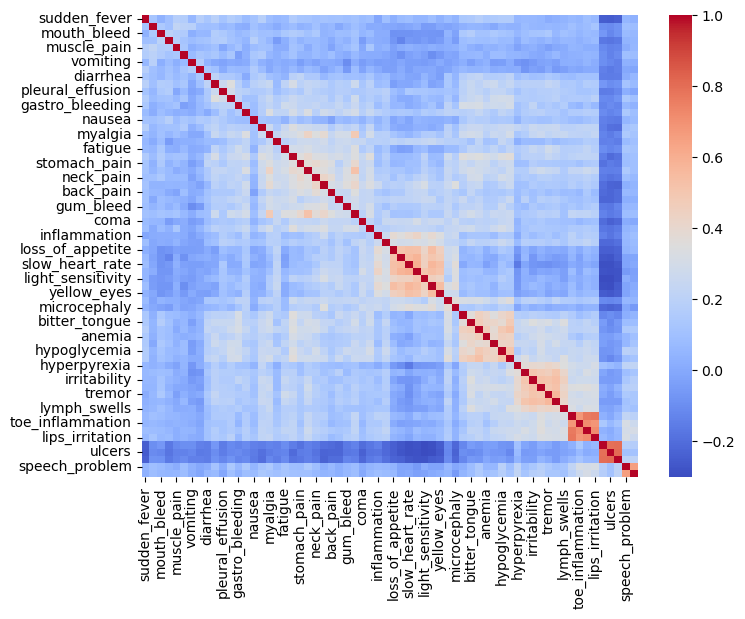

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 
#
#regressor_pipeline = Pipeline([
# ("preprocessing", preprocessing_pipeline),
#("regressor", LinearRegression())
#])
#
#
#

X_temp = X

correlation_matrix = X_temp.corr()

plt.figure(figsize=(8, 6))  # Set figure size

sns.heatmap(correlation_matrix,  cmap="coolwarm",)


#train_df.prognosis.value_counts()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


classifier_pipeline = Pipeline ([
    ("classifier", LogisticRegression(solver='sag',multi_class='ovr'))
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

print ("Train Score Logistic regression sag, one ver rest", classifier_pipeline.score(X_train, y_train))
print ("Test Score Logistic regression sag, one ver rest", classifier_pipeline.score(X_test, y_test))

classifier_pipeline.score(X_test, y_test)

#classifier_pipeline.score(X_train, y_train)
#classifier_pipeline.score(X_test, y_test)

#classifier_pipeline = Pipeline (["classifier", KNeighborsClassifier()])


(565, 64)
(565,)
Train Score Logistic regression sag, one ver rest 0.552212389380531
Test Score Logistic regression sag, one ver rest 0.323943661971831


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.323943661971831

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


classifier_pipeline = Pipeline ([
    ("classifier", KNeighborsClassifier())
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

print ("Train Score KN", classifier_pipeline.score(X_train, y_train))
print ("Test Score  KN", classifier_pipeline.score(X_test, y_test))

classifier_pipeline.score(X_test, y_test)

(565, 64)
(565,)
Train Score KN 0.4176991150442478
Test Score  KN 0.3028169014084507


0.3028169014084507

In [9]:
from sklearn.ensemble import RandomForestClassifier

classifier_pipeline.score(X_test, y_test)

k = 2  
kf = KFold(n_splits=k, shuffle=True, random_state=2)

classifier_pipeline = Pipeline ([
    ("classifier", RandomForestClassifier(n_estimators = 2))
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

print ("Train Score RandomForestClassifier", classifier_pipeline.score(X_train, y_train))
print ("Test Score  RandomForestClassifier", classifier_pipeline.score(X_test, y_test))




(565, 64)
(565,)
Train Score RandomForestClassifier 0.7044247787610619
Test Score  RandomForestClassifier 0.21830985915492956


In [10]:
from sklearn import svm

k = 2  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=2)

classifier_pipeline.score(X_test, y_test)

classifier_pipeline = Pipeline ([
    ("classifier", svm.SVC())
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

#scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
#scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')


print ("Train Score SVM", classifier_pipeline.score(X_train, y_train))
print ("Test Score  SVM", classifier_pipeline.score(X_test, y_test))

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")


(565, 64)
(565,)
Train Score SVM 0.7805309734513274
Test Score  SVM 0.3380281690140845
Accuracy scores for each fold: [0.2614841  0.28723404]
Mean Accuracy: 0.2744


In [11]:
from sklearn import svm

k = 4  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=2)

classifier_pipeline.score(X_test, y_test)

classifier_pipeline = Pipeline ([
    ("classifier", svm.SVC())
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)

#scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
#scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')


print ("Train Score SVM", classifier_pipeline.score(X_train, y_train))
print ("Test Score  SVM", classifier_pipeline.score(X_test, y_test))

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")


(565, 64)
(565,)
Train Score SVM 0.7805309734513274
Test Score  SVM 0.3380281690140845
Accuracy scores for each fold: [0.26056338 0.26950355 0.31205674 0.35460993]
Mean Accuracy: 0.2992


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "classifier__kernel": ["poly", "sigmoid", "linear"],  # Kernels to test
    "classifier__degree": [2, 3, 4],                    # Degree for polynomial kernel
    "classifier__gamma": ["scale", "auto"]              # Kernel coefficient
}


k = 3  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=29)


classifier_pipeline = Pipeline ([
    ("classifier", svm.SVC(kernel="poly"))
])

print(X_train.shape)
print(y_train.shape)

classifier_pipeline.fit(X_train, y_train)
classifier_pipeline.score(X_test, y_test)

scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')
scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=kf, scoring='accuracy')


print ("Train Score SVM", classifier_pipeline.score(X_train, y_train))
print ("Test Score  SVM", classifier_pipeline.score(X_test, y_test))

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

(565, 64)
(565,)
Train Score SVM 0.879646017699115
Test Score  SVM 0.33098591549295775
Accuracy scores for each fold: [0.22751323 0.28723404 0.21808511]
Mean Accuracy: 0.2443


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

k = 4
precision_scorer = make_scorer(precision_score, average='macro', zero_division=0)

kf = KFold(n_splits=k, shuffle=True, random_state=29)
classifier_pipeline = Pipeline ([
    ("classifier", svm.SVC())
])

param_grid = {
    "classifier__kernel": ["poly", "sigmoid", "linear"],  # Kernels to test
    "classifier__degree": [2, 3, 4],                    # Degree for polynomial kernel
}

#
# GridSearchCV
#
grid_search = GridSearchCV(
    estimator=classifier_pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring = {'accuracy':'accuracy', 'precision': precision_scorer},
    refit = 'precision',  # Refits the best model based on 'accuracy'
    verbose=1
)

#
# Fit model
#
grid_search.fit(X_train, y_train)



Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best Cross-Validation Score: 0.2564813819488566
Best Parameters: {'classifier__degree': 2, 'classifier__kernel': 'poly'}
Test Accuracy with Best Parameters: 0.3732
Test Precision with Best Parameters: 0.3551


Confusion Matrix:
 [[53  0  0  0  1  0  0  0  1  1  0]
 [15 37  0  0  0  0  0  6  0  0  0]
 [ 4  2 46  0  0  0  1  4  2  3  2]
 [ 0  0  0 37  0  0  0  0  0  0  0]
 [ 1  0  0  0 33  0  0  0  0  1  3]
 [ 4  0  0  0  0 29  0  0  1  4  1]
 [ 6  2  0  0  0  0 37  8  0  1  3]
 [ 0  0  2  0  0  0  0 44  0  3  2]
 [ 3  2  0  1  0  0  1  3 56  2  1]
 [ 2  0  1  0  0  0  1  2  1 39  0]
 [ 2  1  0  0  0  0  1  0  0  3 43]]


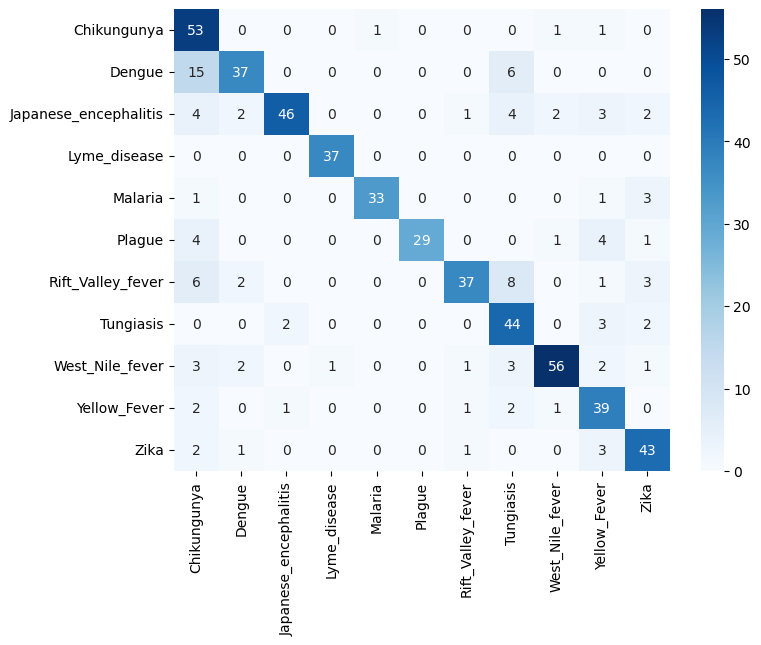

In [ ]:
from sklearn.metrics import confusion_matrix


#
# Predict model
#
y_pred = grid_search.best_estimator_.predict(X_train)
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
test_precision = precision_score(y_test, best_model.predict(X_test), average='macro')

print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)
print(f"Test Accuracy with Best Parameters: {test_score:.4f}")
print(f"Test Precision with Best Parameters: {test_precision:.4f}")

y_train_decoded = label_encoder.inverse_transform (y_train)
y_predict_decoded = label_encoder.inverse_transform (y_pred)

cm = confusion_matrix (y_train_decoded, y_predict_decoded, labels=label_encoder.classes_)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)



Confusion Matrix:
 [[10  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  1  1  0  1  0]
 [ 1  0  7  0  1  0  0  1  3  2  2]
 [ 0  0  1  8  2  1  0  0  2  0  1]
 [ 1  1  1  2  3  0  0  0  2  0  0]
 [ 0  1  3  4  0  0  0  0  3  2  1]
 [ 0  4  0  0  0  0  4  3  2  0  0]
 [ 2  3  1  0  0  0  1 12  0  0  0]
 [ 2  2  4  1  0  1  1  2  3  0  0]
 [ 0  1  1  3  0  4  0  0  1  3  2]
 [ 0  0  0  0  0  1  0  1  2  1  3]]


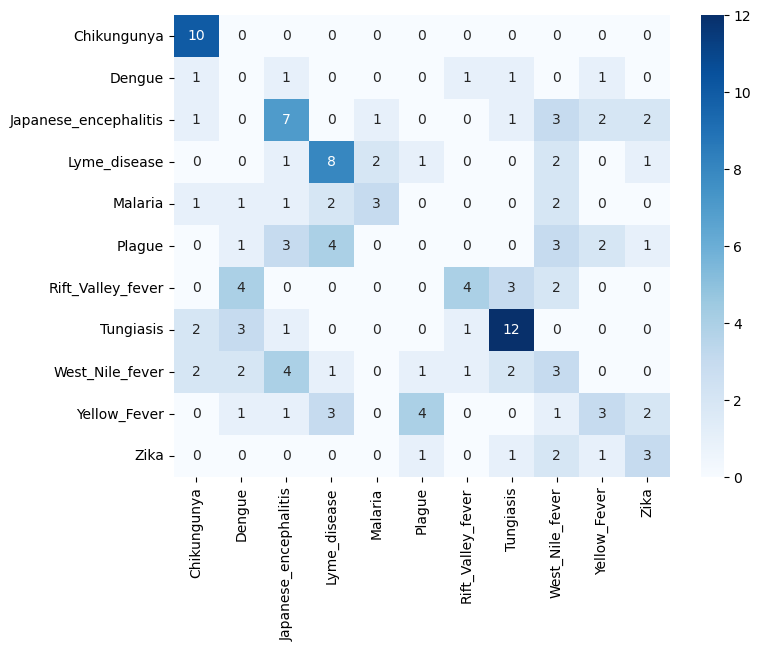

In [ ]:
from sklearn.metrics import confusion_matrix

#
# Test set metrics
#
y_pred = grid_search.best_estimator_.predict(X_test)
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
test_precision = precision_score(y_test, best_model.predict(X_test), average='macro')

print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)
print(f"Test Accuracy with Best Parameters: {test_score:.4f}")
print(f"Test Precision with Best Parameters: {test_precision:.4f}")
#print (y_train.shape)
#print (y_pred.shape)
#print (len(label_encoder.classes_))
#print (label_encoder.classes_)

y_test_decoded = label_encoder.inverse_transform (y_test)
y_predict_decoded = label_encoder.inverse_transform (y_pred)

#print (y_train_decoded)
cm = confusion_matrix (y_test_decoded, y_predict_decoded, labels=label_encoder.classes_)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

print ("Confusion Matrix:\n", cm)